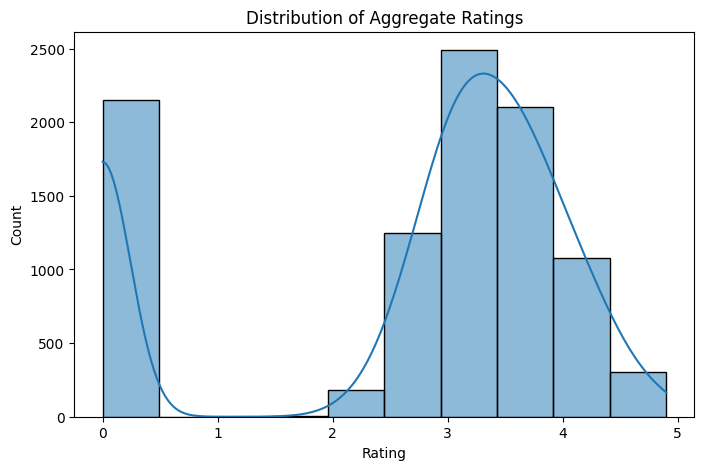

Most common rating range: 0.0
Average number of votes: 156.91
Most common cuisine combinations: [(('North Indian',), 936), (('Chinese', 'North Indian'), 616), (('Mughlai', 'North Indian'), 394), (('Chinese',), 354), (('Fast Food',), 354)]
Top-rated cuisine combinations: Cuisines
(World Cuisine,)             4.9
(Deli, Italian)              4.9
(Contemporary, European)     4.9
(Indonesian, Sunda)          4.9
(Bar Food, Burger, Steak)    4.9
Name: Aggregate rating, dtype: float64


<ipython-input-11-199a2af7f217>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Cuisine Combinations"] = df["Cuisines"].apply(lambda x: tuple(sorted(x.split(", "))))


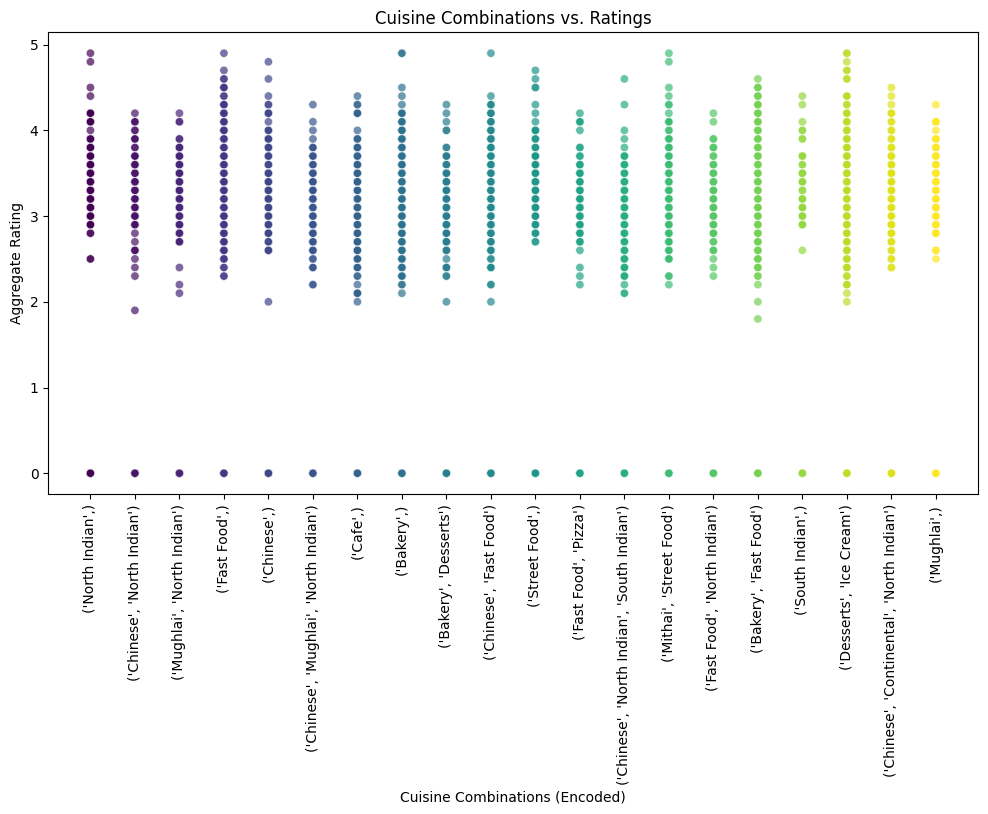

Restaurant map saved as restaurant_map.html
Identified restaurant chains: Restaurant Name
Cafe Coffee Day                   83
Domino's Pizza                    79
Subway                            63
Green Chick Chop                  51
McDonald's                        48
                                  ..
Zaika Kathi Rolls                  2
The Night Owl                      2
The Cheesecake Factory             2
New Kadimi                         2
Ceviche Tapas Bar & Restaurant     2
Name: count, Length: 734, dtype: int64
Top-rated restaurant chains: Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Gymkhana                     4.700
The Cheesecake Factory       4.650
Dishoom                      4.600
Garota de Ipanema            4.600
Chili's                      4.580
Name: Aggregate rating, dtype: float64


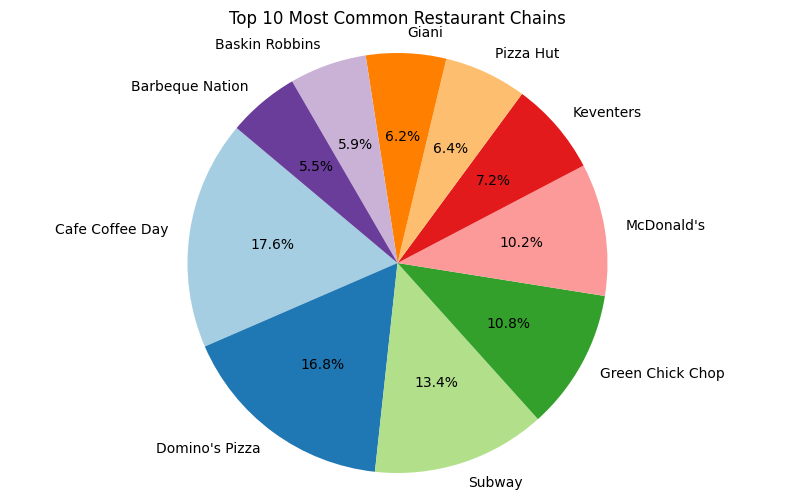

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import folium
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/content/Dataset  (1).csv"
df = pd.read_csv(file_path)

# Task 1: Restaurant Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=10, kde=True)
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

most_common_rating_range = df['Aggregate rating'].value_counts().idxmax()
print(f"Most common rating range: {most_common_rating_range}")

average_votes = df['Votes'].mean()
print(f"Average number of votes: {average_votes:.2f}")

# Task 2: Cuisine Combination
cuisine_combinations = df['Cuisines'].dropna().apply(lambda x: tuple(sorted(x.split(", "))))
cuisine_counter = Counter(cuisine_combinations)
most_common_cuisine_combination = cuisine_counter.most_common(5)
print("Most common cuisine combinations:", most_common_cuisine_combination)

# Check if certain combinations have higher ratings
cuisine_rating = df.groupby(cuisine_combinations)['Aggregate rating'].mean()
print("Top-rated cuisine combinations:", cuisine_rating.sort_values(ascending=False).head(5))

# Drop rows with missing cuisine values
df = df.dropna(subset=["Cuisines"])

# Create cuisine combinations
df["Cuisine Combinations"] = df["Cuisines"].apply(lambda x: tuple(sorted(x.split(", "))))

# Get the most common cuisine combinations
common_combinations = df["Cuisine Combinations"].value_counts().head(20).index

# Filter dataset for only common cuisine combinations
filtered_df = df[df["Cuisine Combinations"].isin(common_combinations)].copy()

# Encode cuisine combinations into numeric values for plotting
label_encoder = LabelEncoder()
filtered_df["Cuisine Code"] = label_encoder.fit_transform(filtered_df["Cuisine Combinations"].astype(str))

# Scatter plot
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(
    data=filtered_df,
    x="Cuisine Code",
    y="Aggregate rating",
    hue="Cuisine Code",
    palette="viridis",
    alpha=0.7
)

# Customize plot
plt.xlabel("Cuisine Combinations (Encoded)")
plt.ylabel("Aggregate Rating")
plt.title("Cuisine Combinations vs. Ratings")
plt.xticks(ticks=range(len(common_combinations)), labels=[str(c) for c in common_combinations], rotation=90)
plt.legend([], [], frameon=False)  # Hide automatic legend for encoded values

# Show plot
plt.show()

# Task 3: Geographic Analysis
map_ = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)
for _, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(map_)
map_.save("restaurant_map.html")
print("Restaurant map saved as restaurant_map.html")

# Task 4: Restaurant Chains
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]
print("Identified restaurant chains:", restaurant_chains)

# Analyze ratings of restaurant chains
chain_ratings = df[df['Restaurant Name'].isin(restaurant_chains.index)].groupby('Restaurant Name')['Aggregate rating'].mean()
print("Top-rated restaurant chains:", chain_ratings.sort_values(ascending=False).head(10))

# Count occurrences of each restaurant name
restaurant_counts = df["Restaurant Name"].value_counts()

# Filter for restaurant chains (appearing more than once)
chains = restaurant_counts[restaurant_counts > 1]

# Plot pie chart for top 10 restaurant chains
plt.figure(figsize=(10, 6))
plt.pie(chains[:10], labels=chains.index[:10], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top 10 Most Common Restaurant Chains")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

